In [1]:
import numpy as np
test = np.linspace(1,10,10)
test[2:-2]

array([3., 4., 5., 6., 7., 8.])

In [2]:
from Nozzle_1D import Nozzle
temp = Nozzle("inputs.nml")
import matplotlib.pyplot as plt

In [ ]:
temp.set_geometry()
temp.set_initial_conditions()
temp.set_boundary_conditions()
temp.set_conserved_variables()
temp.set_primitive_variables()
temp.set_source_term()

(10, 3)

In [4]:
import numpy as np
np.maximum(0,np.linspace(-1,2,10))

array([0.        , 0.        , 0.        , 0.        , 0.33333333,
       0.66666667, 1.        , 1.33333333, 1.66666667, 2.        ])

[300.         344.13651731 385.23337172 311.89028896 270.82767847
 208.48217389 132.19169105  93.30633096  82.96091829  76.84935221]


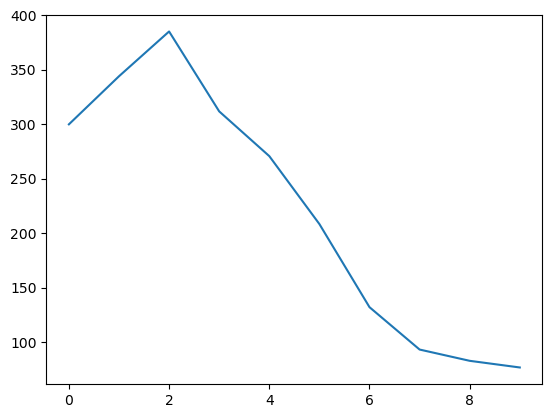

In [43]:
for i in range(10):
    temp.iteration_step()
    temp.update_all()
print(temp.p)
plt.plot(temp.p)

In [6]:

sadf

NameError: name 'sadf' is not defined

In [ ]:
import numpy as np

In [ ]:
def T(gamma,M,T0):
    return T0/psi(gamma,M)

def P(gamma,M,P0):
    return P0/(psi(gamma,M)**(gamma/(gamma-1)))
def rho(P,R,T):
    return P/(R*T)
def u(gamma,M,R,T):
    return M*np.sqrt(gamma*R*T)

def psi(gamma,M):
    return 1+((gamma-1)/2)*M**2
def conserved_to_primitive(U, gamma=1.4):
    rho = U[0]  # Density
    u = U[1] / rho  # Velocity
    p = (gamma - 1) * (U[2] - 0.5 * rho * u**2)  # Pressure

    return np.array([rho, u, p])
def primitive_to_conserved(V,gamma=1.4):
    pass
def set_boundary_conditions():
    pass

In [ ]:
# Case 1
NI = 11
p0 = 300 #kPa
T0 = 600 #K
Ru = 8314
M = 28.97 
R = Ru/M
p_inf = 101 #kpa
T_inf = 293 #K
x = np.linspace(-1,1,NI)
A = np.zeros((x.shape[0]+2))
A[1:-1] = .2+.4*(1+np.sin(np.pi*(x-.5)))
A[0] = 2*A[1]-A[2]
A[-1] = 2*A[-2]-A[-3]

A = (A[1:] + A[0:-1])/2 # A is half values

p = np.zeros(NI-1)+p_inf # plus ghost nodes
u = np.zeros_like(p)
rho = np.zeros_like(p)+p_inf/(R*T_inf)
deltat = .0000001
deltax = x[1]-x[0]
S = np.zeros((3,NI+2))
gamma = 1.4



In [ ]:
u.shape

In [ ]:
rho.shape

In [ ]:
T = p/(rho*R)
et = (R/(gamma-1))*T+.5*(u**2)
ht = (gamma*R/(gamma-1))*T+.5*u**2
F = np.zeros((u.shape[0]+2,3))
U = np.zeros_like(F)
U[1:-1] = np.array([rho,rho*u,rho*et]).T
F[1:-1] = np.array([rho*u,rho*u**2+p,rho*u*ht]).T
V = np.zeros_like(U)


In [ ]:
rho.shape

In [ ]:
# Extrapolate ghost nodes
F[0] = 2*F[1]-F[2]
F[-1] = 2*F[-2]-F[-3]

U[0] = 2*U[1]-U[2]
U[-1] = 2*U[-2]-U[-3]

A[0] = 2*A[1]-A[2]
A[-1] = 2*A[-2]-A[-3]

In [ ]:
def primitive_to_conserved(V,gamma=1.4,R=1):
    T = p/(rho*R)
    et = (R/(gamma-1))*T+.5*(u**2)
    ht = (gamma*R/(gamma-1))*T+.5*u**2
    U = np.array([rho,rho*u,rho*et]).T
    F = np.array([rho*u,rho*u**2+p,rho*u*ht]).T
    V = np.zeros_like(U)


In [ ]:
A.shape

In [ ]:
S = np.zeros_like(F)
for i in range(NI-1):
    #S[i+1,1]=p[i]*(A[i+1]-A[i])
    S[i+1,1]=p[i]*0.4 * np.pi * np.cos(np.pi * (x[i] - 0.5))


In [ ]:
S.shape

In [ ]:
A

In [ ]:
for t in range(3000):
    for i in range(1,NI):
        Volume = (A[i])*deltax/2
        U[i] = U[i]-(F[i+1]*A[i+1]-F[i-1]*A[i-1] -S[i]*deltax)*deltat/(Volume)
        V[i]=conserved_to_primitive(U[i])
    F[0] = 2*F[1]-F[2]
    F[-1] = 2*F[-2]-F[-3]

    U[0] = 2*U[1]-U[2]
    U[-1] = 2*U[-2]-U[-3]
    V[-1] = conserved_to_primitive(U[-1])
    V[0] = conserved_to_primitive(U[0])



    rho = V[:,0]
   # print(rho)
    u = V[:,1]
    p = V[:,2]
    p[1] = p0
    p[-2] = p_inf
    rho[1] = p0/(R*T0)
    for i in range(NI-1):
        S[i+1,1]=p[i]*0.4 * np.pi * np.cos(np.pi * (x[i] - 0.5))
    


    
    T = p/(rho*R)
    et = (R/(gamma-1))*T+.5*(u**2)
    ht = (gamma*R/(gamma-1))*T+.5*u**2
    U = np.array([rho,rho*u,rho*et]).T
    F = np.array([rho*u,rho*u**2+p,rho*u*ht]).T
    print(p)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(p)